In [1]:
# Download the coursekata package, which contains helpful R commands
library(coursekata)

── CourseKata packages ──────────────────────────────────── coursekata 0.18.0 ──
✔ dslabs              0.7.6         ✔ Metrics             0.1.4  
✔ Lock5withR          1.2.2         ✔ lsr                 0.5.2  
✔ fivethirtyeightdata 0.1.0         ✔ mosaic              1.8.4.2
✔ fivethirtyeight     0.6.2         ✔ supernova           2.5.7  


In [2]:
# Download the solar dataset
solar_dat <- read.csv('https://skewthescript.org/s/solar-small.csv')

In [3]:
# Print the head of the dataset
head(solar_dat)

,Date,Minute,Plant,Forecast_Temp,Forecast_Sky,Power
,<chr>,<int>,<chr>,<dbl>,<chr>,<dbl>
1,5/15/2020,0,A,25.18432,Clear,0
2,5/15/2020,15,A,25.08459,Clear,0
3,5/15/2020,30,A,24.93575,Clear,0
4,5/15/2020,45,A,24.84613,Clear,0
5,5/15/2020,60,A,24.62153,Clear,0
6,5/15/2020,75,A,24.53609,Clear,0


In [4]:
# Print dimensions of dataset
dim(solar_dat)

[1] 5233    6

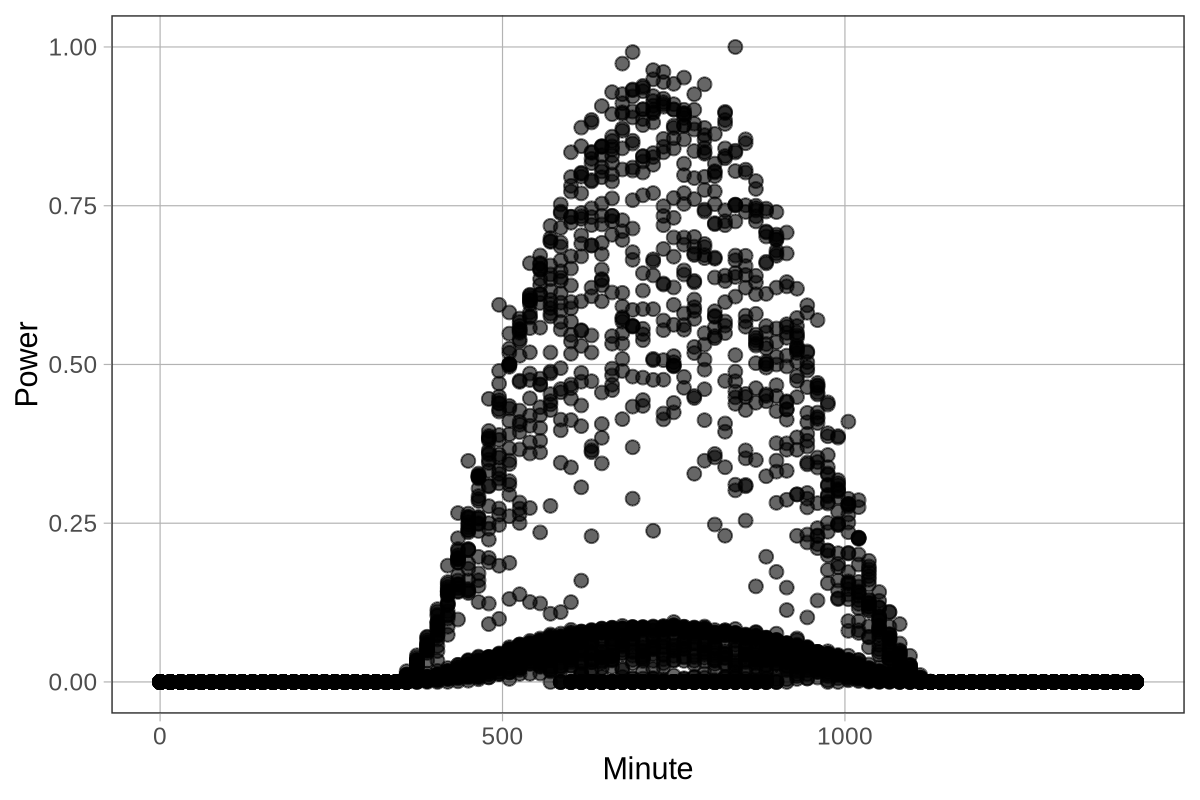

In [5]:
# Visualize scatterplot of Power ~ Min
gf_point(Power ~ Minute, data = solar_dat)

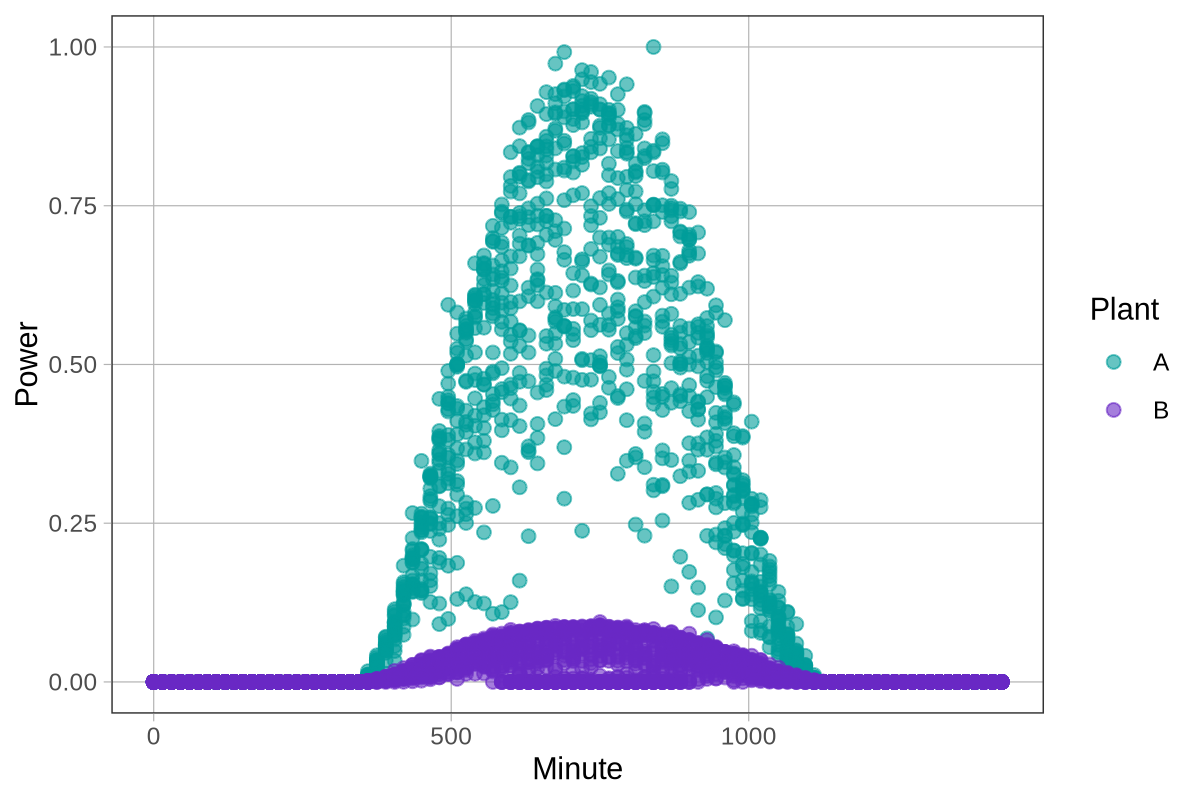

In [6]:
# Visualize scatterplot of Power ~ Min, color by Plant
gf_point(Power ~ Minute, color = ~Plant, data = solar_dat)

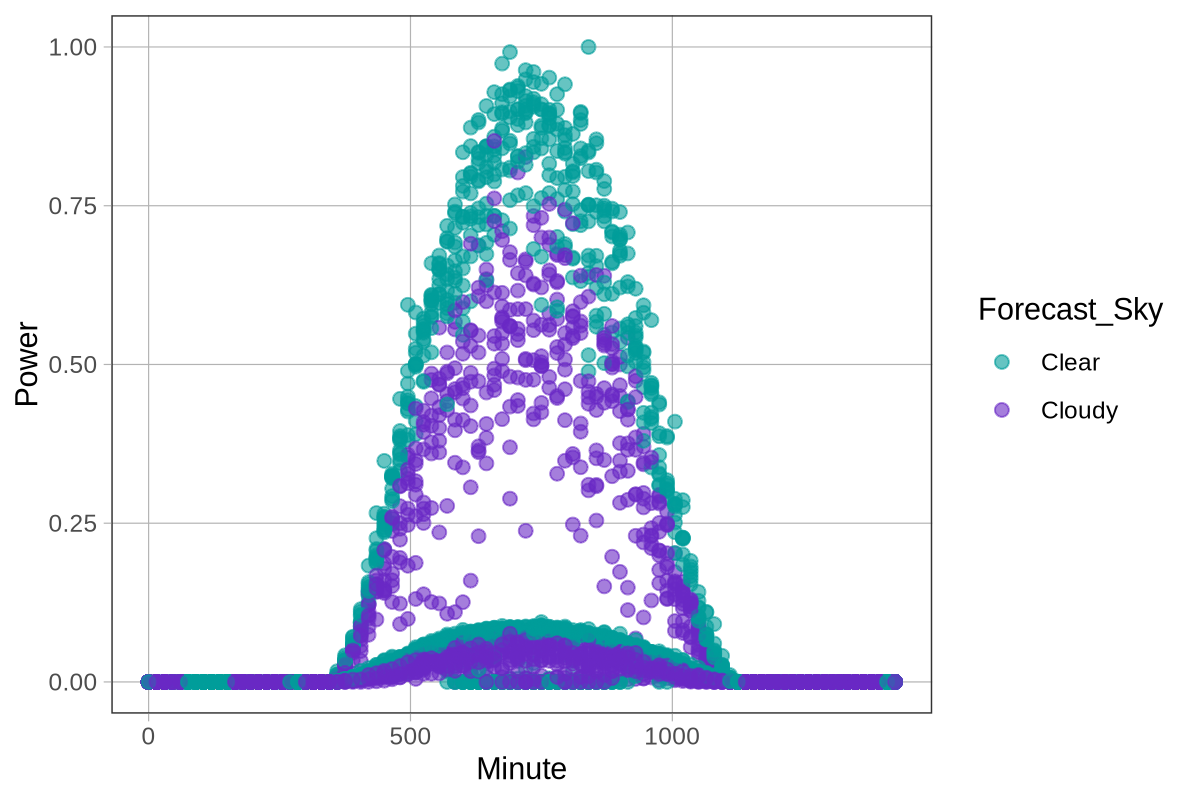

In [7]:
# Visualize scatterplot of Power ~ Min, color by Forecast_Sky
gf_point(Power ~ Minute, color = ~Forecast_Sky, data = solar_dat)

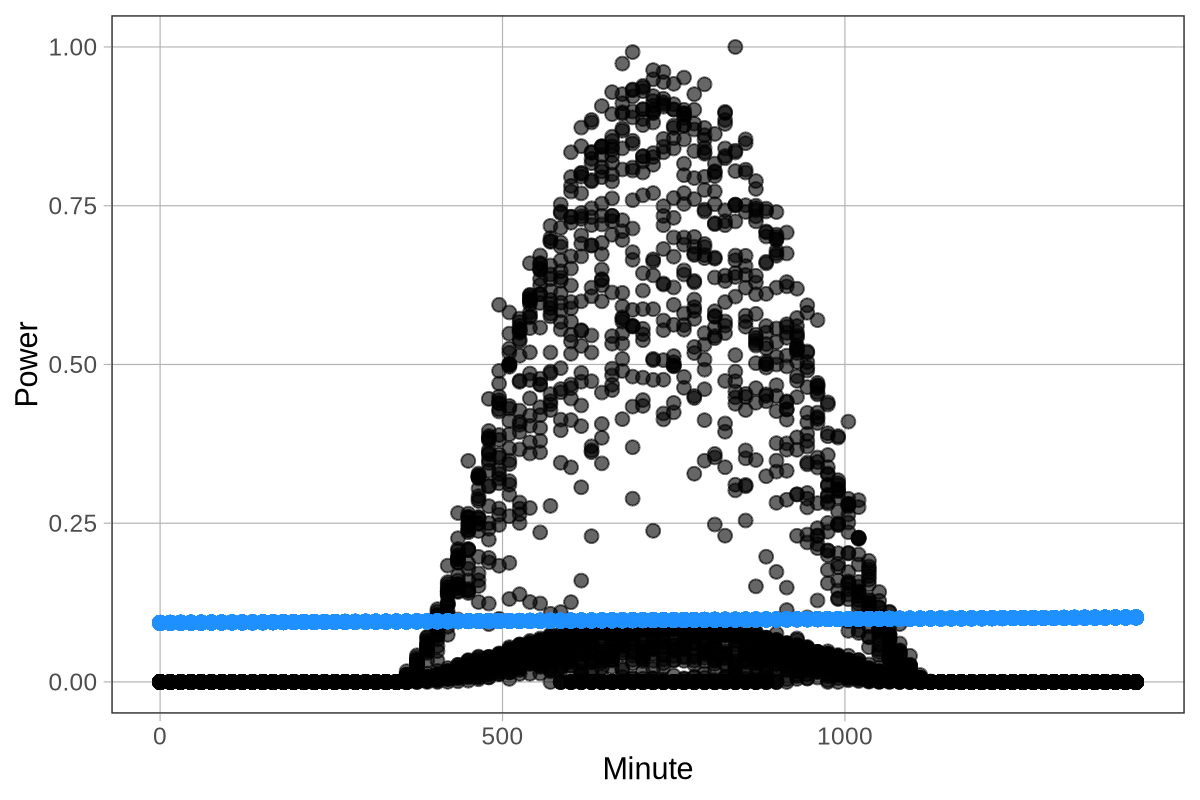

In [8]:
# Model for (Power ~ Minute)
simple_linear_model <- lm(Power ~ Minute, data = solar_dat)

# Get model predictions for power, based on minute of day
simple_preds <- predict(simple_linear_model)

# Visualize model predictions
gf_point(Power ~ Minute, data = solar_dat) %>% 
    gf_point(simple_preds ~ Minute, data = solar_dat, color = 'dodgerblue')

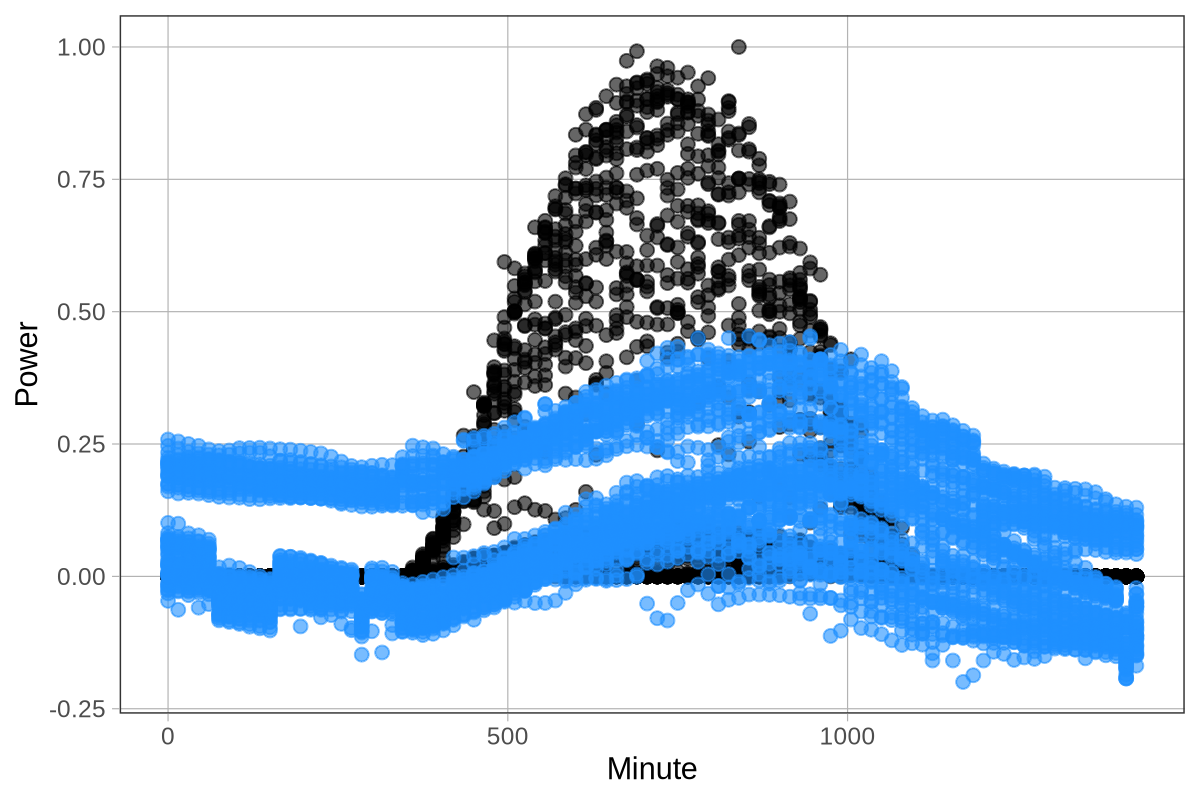

In [9]:
# Model for (Power ~ Minute + Plant + Forecast_Temp + Forecast_Sky)
mult_linear_model <- lm(Power ~ Minute + Plant + Forecast_Temp + Forecast_Sky, data = solar_dat)

# Get model predictions for power, based on minute of day
mult_preds <- predict(mult_linear_model)

# Visualize model predictions
gf_point(Power ~ Minute, data = solar_dat) %>% 
    gf_point(mult_preds ~ Minute, data = solar_dat, color = 'dodgerblue')

In [10]:
# Get errors (actual - predicted)
mult_errors <- solar_dat$Power - predict(mult_linear_model)

# Get RMSE
sqrt(mean(mult_errors^2))

[1] 0.1597398

In [11]:
# Select NOT the Date column with the -c() notation
solar_dat <- select(solar_dat, -c('Date'))
head(solar_dat)

,Minute,Plant,Forecast_Temp,Forecast_Sky,Power
,<int>,<chr>,<dbl>,<chr>,<dbl>
1,0,A,25.18432,Clear,0
2,15,A,25.08459,Clear,0
3,30,A,24.93575,Clear,0
4,45,A,24.84613,Clear,0
5,60,A,24.62153,Clear,0
6,75,A,24.53609,Clear,0


In [12]:
# Scale the Minute variables, by dividing it by its maximum
solar_dat$Minute /  max(solar_dat$Minute)

[1] 0.00000000 0.01052632 0.02105263 0.03157895 0.04210526 0.05263158
   [7] 0.06315789 0.07368421 0.08421053 0.09473684 0.10526316 0.11578947
  [13] 0.12631579 0.13684211 0.14736842 0.15789474 0.16842105 0.17894737
  [19] 0.18947368 0.20000000 0.21052632 0.22105263 0.23157895 0.24210526
  [25] 0.25263158 0.26315789 0.27368421 0.28421053 0.29473684 0.30526316
  [31] 0.31578947 0.32631579 0.33684211 0.34736842 0.35789474 0.36842105
  [37] 0.37894737 0.38947368 0.40000000 0.41052632 0.42105263 0.43157895
  [43] 0.44210526 0.45263158 0.46315789 0.47368421 0.48421053 0.49473684
  [49] 0.50526316 0.51578947 0.52631579 0.53684211 0.54736842 0.55789474
  [55] 0.56842105 0.57894737 0.58947368 0.60000000 0.61052632 0.62105263
  [61] 0.63157895 0.64210526 0.65263158 0.66315789 0.67368421 0.68421053
  [67] 0.69473684 0.70526316 0.71578947 0.72631579 0.73684211 0.74736842
  [73] 0.75789474 0.76842105 0.77894737 0.78947368 0.89473684 0.90526316
  [79] 0.91578947 0.92631579 0.93684211 0.94736842 0.95789474 0.96842105
  [85] 0.09473684 0.10526316 0.11578947 0.12631579 0.13684211 0.14736842
  [91] 0.15789474 0.16842105 0.17894737 0.18947368 0.20000000 0.21052632
  [97] 0.22105263 0.23157895 0.24210526 0.25263158 0.26315789 0.27368421
 [103] 0.28421053 0.29473684 0.30526316 0.31578947 0.32631579 0.33684211
 [109] 0.34736842 0.35789474 0.36842105 0.37894737 0.38947368 0.40000000
 [115] 0.41052632 0.42105263 0.43157895 0.44210526 0.45263158 0.46315789
 [121] 0.47368421 0.48421053 0.49473684 0.50526316 0.51578947 0.52631579
 [127] 0.53684211 0.54736842 0.55789474 0.56842105 0.57894737 0.58947368
 [133] 0.60000000 0.61052632 0.62105263 0.63157895 0.64210526 0.65263158
 [139] 0.66315789 0.67368421 0.68421053 0.69473684 0.70526316 0.71578947
 [145] 0.72631579 0.73684211 0.74736842 0.75789474 0.76842105 0.77894737
 [151] 0.78947368 0.80000000 0.81052632 0.82105263 0.83157895 0.84210526
 [157] 0.85263158 0.86315789 0.87368421 0.88421053 0.89473684 0.90526316
 [163] 0.91578947 0.92631579 0.93684211 0.94736842 0.95789474 0.96842105
 [169] 0.97894737 0.98947368 1.00000000 0.00000000 0.01052632 0.02105263
 [175] 0.03157895 0.04210526 0.05263158 0.06315789 0.07368421 0.08421053
 [181] 0.09473684 0.10526316 0.11578947 0.12631579 0.13684211 0.14736842
 [187] 0.15789474 0.16842105 0.17894737 0.18947368 0.20000000 0.21052632
 [193] 0.22105263 0.23157895 0.24210526 0.25263158 0.26315789 0.27368421
 [199] 0.28421053 0.29473684 0.30526316 0.31578947 0.32631579 0.33684211
 [205] 0.34736842 0.35789474 0.36842105 0.37894737 0.38947368 0.40000000
 [211] 0.41052632 0.42105263 0.43157895 0.44210526 0.45263158 0.46315789
 [217] 0.47368421 0.48421053 0.49473684 0.50526316 0.51578947 0.52631579
 [223] 0.53684211 0.54736842 0.55789474 0.56842105 0.57894737 0.58947368
 [229] 0.60000000 0.61052632 0.62105263 0.63157895 0.64210526 0.65263158
 [235] 0.66315789 0.67368421 0.68421053 0.69473684 0.70526316 0.71578947
 [241] 0.72631579 0.73684211 0.74736842 0.75789474 0.76842105 0.77894737
 [247] 0.78947368 0.80000000 0.81052632 0.82105263 0.83157895 0.84210526
 [253] 0.85263158 0.86315789 0.87368421 0.88421053 0.89473684 0.90526316
 [259] 0.91578947 0.92631579 0.93684211 0.94736842 0.95789474 0.96842105
 [265] 0.97894737 0.98947368 1.00000000 0.00000000 0.01052632 0.02105263
 [271] 0.03157895 0.04210526 0.05263158 0.06315789 0.07368421 0.08421053
 [277] 0.09473684 0.10526316 0.11578947 0.12631579 0.13684211 0.14736842
 [283] 0.15789474 0.16842105 0.17894737 0.18947368 0.20000000 0.21052632
 [289] 0.22105263 0.23157895 0.24210526 0.25263158 0.26315789 0.27368421
 [295] 0.28421053 0.29473684 0.30526316 0.31578947 0.32631579 0.33684211
 [301] 0.34736842 0.35789474 0.36842105 0.37894737 0.38947368 0.40000000
 [307] 0.41052632 0.42105263 0.43157895 0.44210526 0.45263158 0.46315789
 [313] 0.47368421 0.48421053 0.49473684 0.50526316 0.51578947 0.52631579
 [319] 0.53684211 0.54736842 0.55789474 0.56842105 0.57894737 0.58947368
 [325] 0.60000000 0.61052632 0.62105263 0.63157895 0.64210526

In [14]:
# Use model.matrix to one-hot encode our data
solar_dat <- model.matrix( ~ 0 + . , data = solar_dat)
head(solar_dat)

,Minute,PlantA,PlantB,Forecast_Temp,Forecast_SkyCloudy,Power
1,0.00000000,1,0,0.6427581,0,0
2,0.01052632,1,0,0.6402129,0,0
3,0.02105263,1,0,0.6364142,0,0
4,0.03157895,1,0,0.6341269,0,0
5,0.04210526,1,0,0.6283945,0,0
6,0.05263158,1,0,0.6262141,0,0


In [15]:
# Put data into data.frame object type
solar_dat <- data.frame(solar_dat)

In [16]:
# Load extra package for neural networks, called neuralnet
install.packages('neuralnet')
library(neuralnet)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute




In [17]:
# set a seed for a consistent random start point in model fitting
set.seed(100)

# Build neural network model, one layer of 4 neurons
model <- neuralnet(
    Power ~ Minute + PlantA + PlantB + Forecast_Temp + Forecast_SkyCloudy,
    data = solar_dat,
    lifesign = 'full',
    threshold = 0.05,
    hidden=4)

hidden: 4    thresh: 0.05    rep: 1/1    steps: 
   1000	min thresh: 0.136822378021701
                                                
   2000	min thresh: 0.0674893946654781
                                                
   3000	min thresh: 0.0674893946654781
                                                
   4000	min thresh: 0.0517090910019101
                                                
   5000	min thresh: 0.0517090910019101
                                                
   5980
	error: 4.97281
	time: 6.09 secs



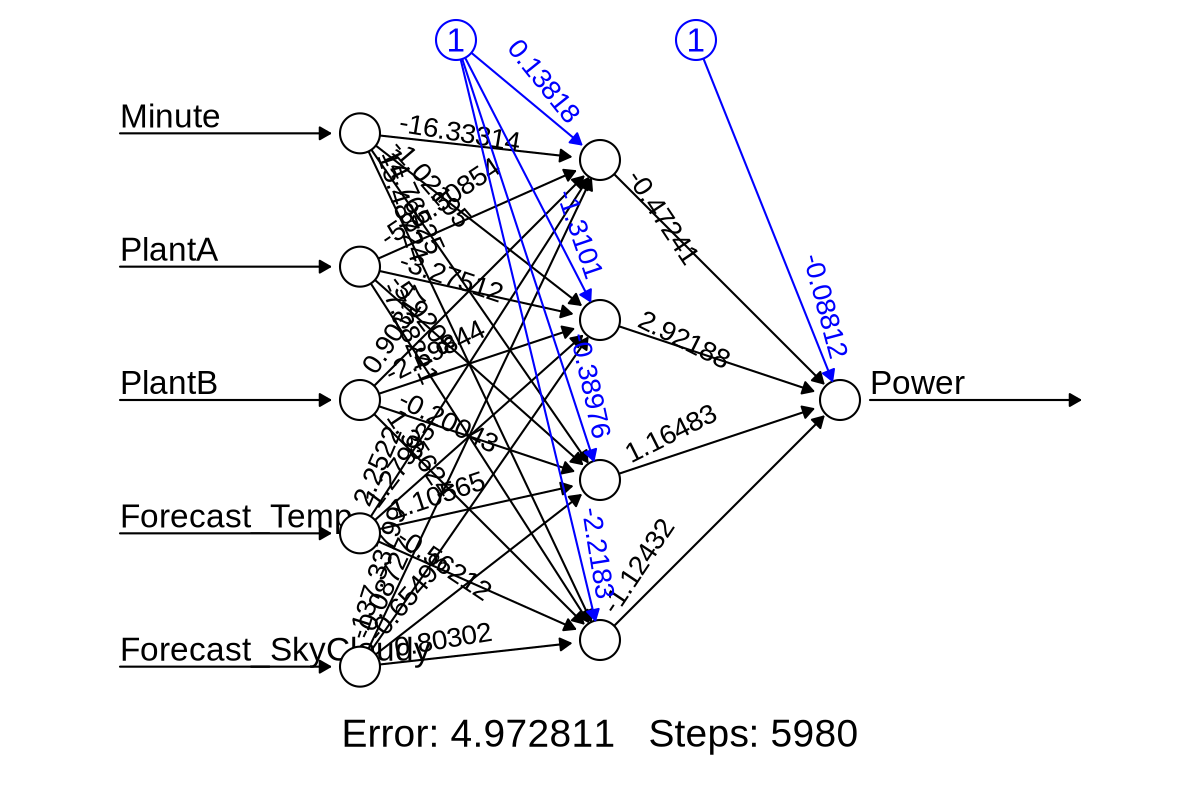

In [18]:
# Visualize the neural network
plot(model,rep = "best")

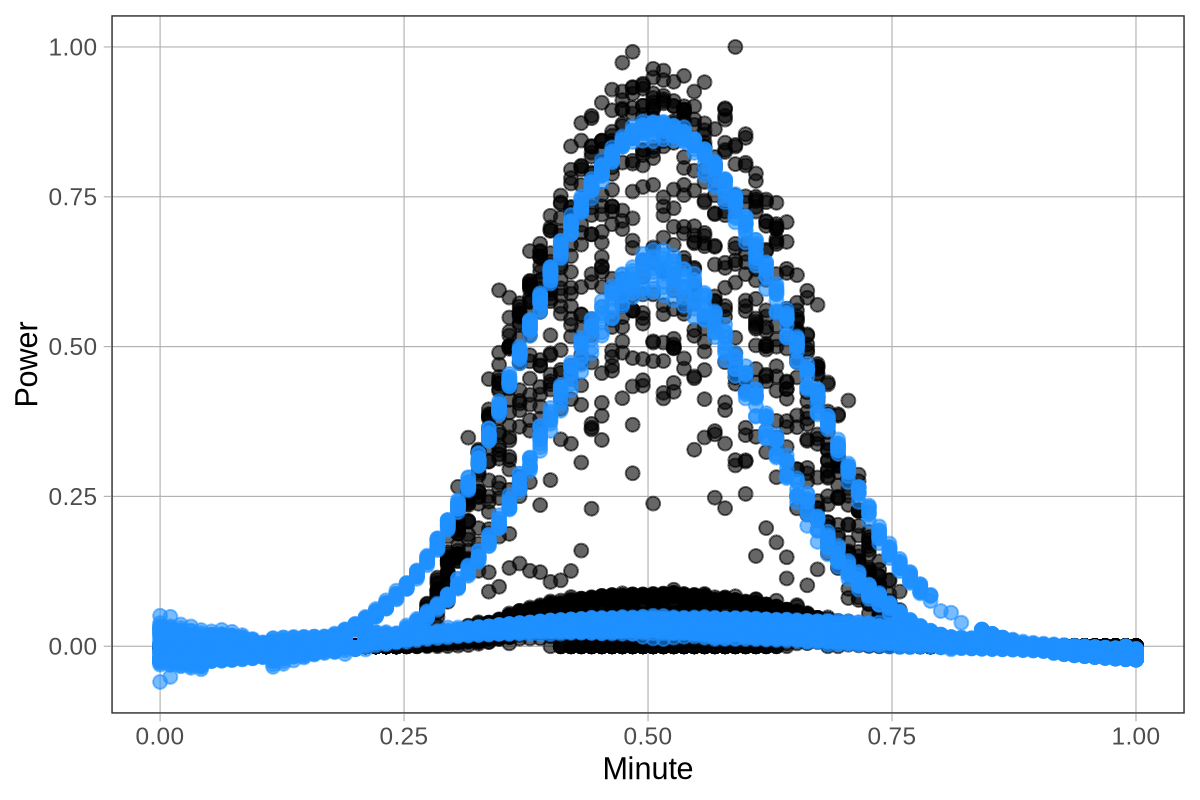

In [19]:
# Get predictions of our neural network
net_preds <- predict(model, newdata = solar_dat)

# Visualize model predictions
gf_point(Power ~ Minute, data = solar_dat) %>%
    gf_point(net_preds ~ Minute, data = solar_dat, color = 'dodgerblue')

In [20]:
# Get neural network's errors (actual - predicted)
net_errors <- solar_dat$Power - net_preds

# Get RMSE on test set
sqrt(mean(net_errors^2))

[1] 0.04359539

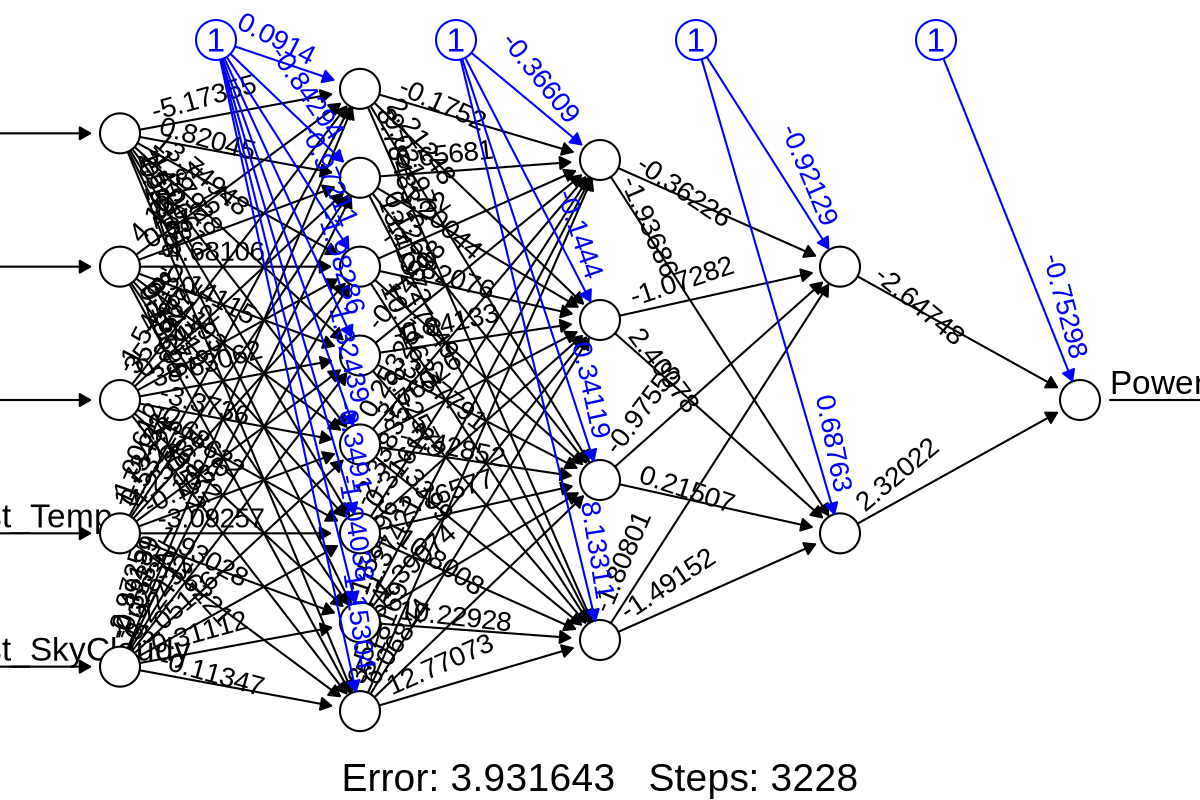

In [22]:
# Visualize complex neural network
plot(model_complex,rep = "best")

In [23]:
# Get predictions from complex model
complex_net_preds <- predict(model_complex, newdata = solar_dat)

# Get errors (actual - predicted)
net_complex_errors <- solar_dat$Power - complex_net_preds

# Get RMSE
sqrt(mean(net_complex_errors^2))

[1] 0.03876383

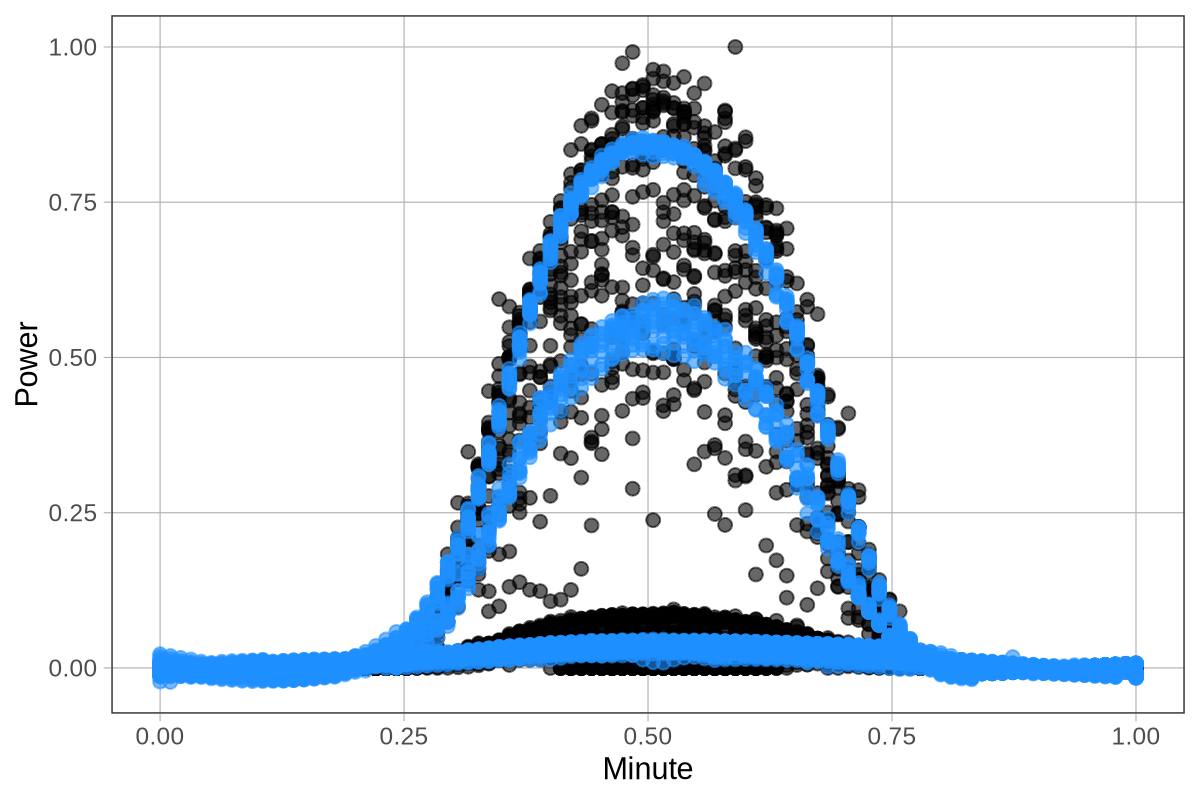

In [24]:
# Get predictions of our neural network
net_preds2 <- predict(model_complex, newdata = solar_dat)

# Visualize model predictions
gf_point(Power ~ Minute, data = solar_dat) %>%
    gf_point(net_preds2 ~ Minute, data = solar_dat, color = 'dodgerblue')